<a href="https://colab.research.google.com/github/BRBrum/Halliburton/blob/main/BR1Benford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.31
    Uninstalling SQLAlchemy-2.0.31:
      Successfully uninstalled SQLAlchemy-2.0.31
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.52 which is incompatible.


In [2]:
import obspy
import pandas as pd

# Função para listar todos os campos disponíveis no cabeçalho
def list_header_fields(file_path):
    stream = obspy.read(file_path, format='SEGY')
    for trace in stream:
        header = trace.stats.segy.trace_header
        print(header)
        break  # Imprimir apenas o primeiro cabeçalho para referência

# Função para ler arquivo SEGY e extrair amplitudes
def read_segy(file_path):
    stream = obspy.read(file_path, format='SEGY')
    data = []
    for trace in stream:
        header = trace.stats.segy.trace_header
        trace_data = {
            "trace_number": header.trace_sequence_number_within_line,
            "amplitudes": trace.data
        }
        data.append(trace_data)
    return pd.DataFrame(data)

# Caminhos dos arquivos
file_path_1 = '/content/0057_ESPIRITO_SANTO_39.0057-0212.MIG_FIN.57.sgy'
file_path_2 = '/content/0057_ESPIRITO_SANTO_39.0057-0212.STK_FIN.22.sgy'

# Listar campos do cabeçalho disponíveis
print("Campos do cabeçalho do primeiro arquivo:")
list_header_fields(file_path_1)

print("Campos do cabeçalho do segundo arquivo:")
list_header_fields(file_path_2)

# Ler arquivos SEGY e criar dataframes
df_1 = read_segy(file_path_1)
df_2 = read_segy(file_path_2)

# Exibir os dataframes
print("DataFrame do primeiro arquivo (MIG):")
print(df_1.head())

print("DataFrame do segundo arquivo (STK):")
print(df_2.head())


Campos do cabeçalho do primeiro arquivo:
LazyTraceHeaderAttribDict({'unpacked_header': b'\x00\x00\x00\x01\x00\x00\x00\x01\xff\xff\xff\xf2\x00\x00\x00\x01\xc1\xe0\x00\x00\x00\x00\x00\x1e\xff\xff\xff\xf2\x00\x01\x00\x01\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x01\x00\x064L\x00x\x83{\x00x\x84\n\x00\x063\xc1\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\xa0\x07\xd1\x07\xd0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00x\x84\n\x00\x063\xc1\x00\x00\x00\x03A\x10\x00\x00A\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e\x00\x00\x00\x1e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e\x00\x00\x00\x01\x00\x00\x00\x00\

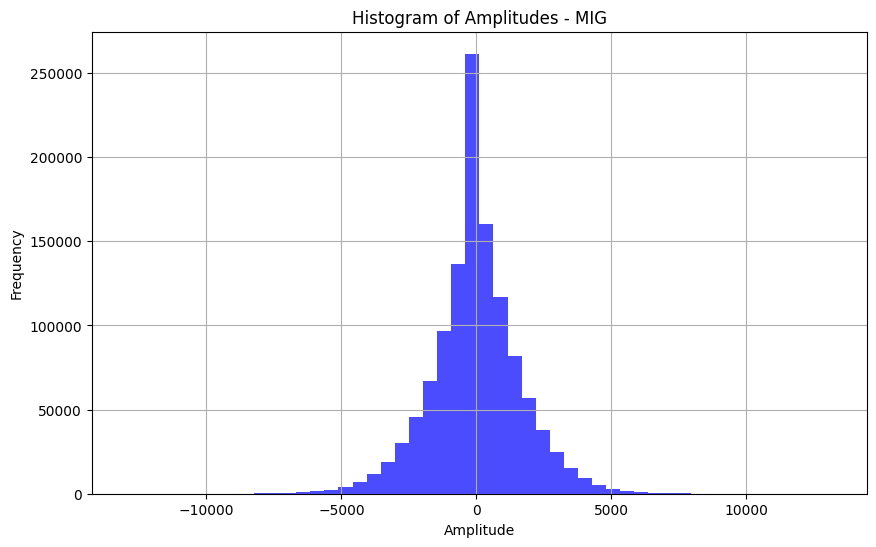

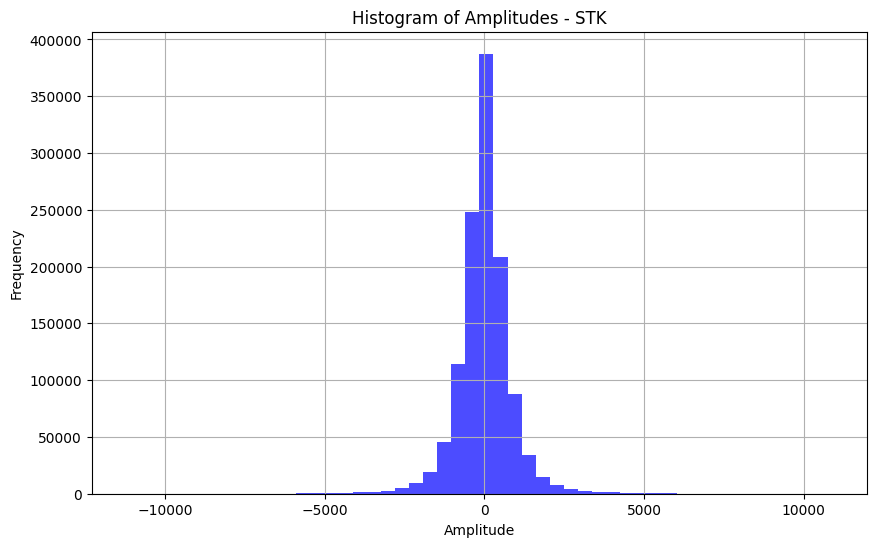

In [17]:
import matplotlib.pyplot as plt

# Função para plotar histograma das amplitudes
def plot_histogram(df, title):
    amplitudes = df['amplitudes'].explode()  # Flatten the list of amplitudes
    plt.figure(figsize=(10, 6))
    plt.hist(amplitudes, bins=50, color='blue', alpha=0.7)
    plt.title(f'Histogram of Amplitudes - {title}')
    plt.xlabel('Amplitude')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plotar histogramas das amplitudes para os dataframes existentes
plot_histogram(df_1, 'MIG')
plot_histogram(df_2, 'STK')


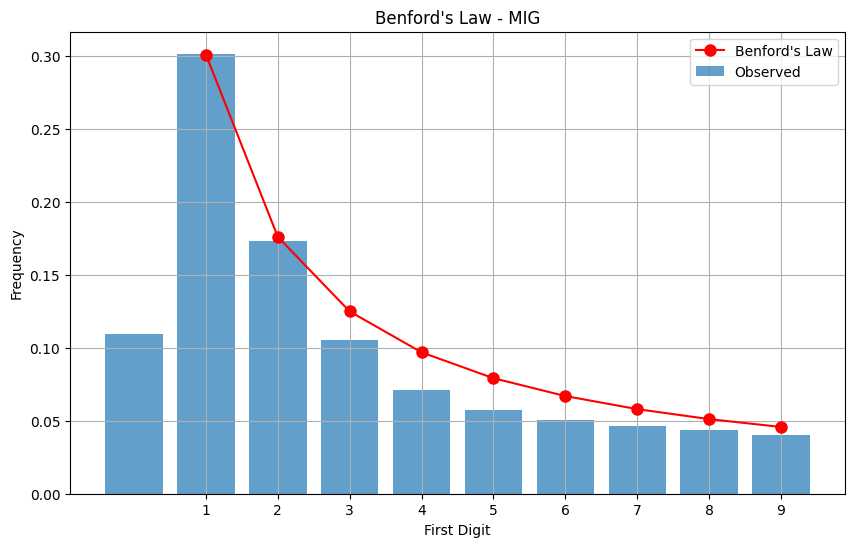

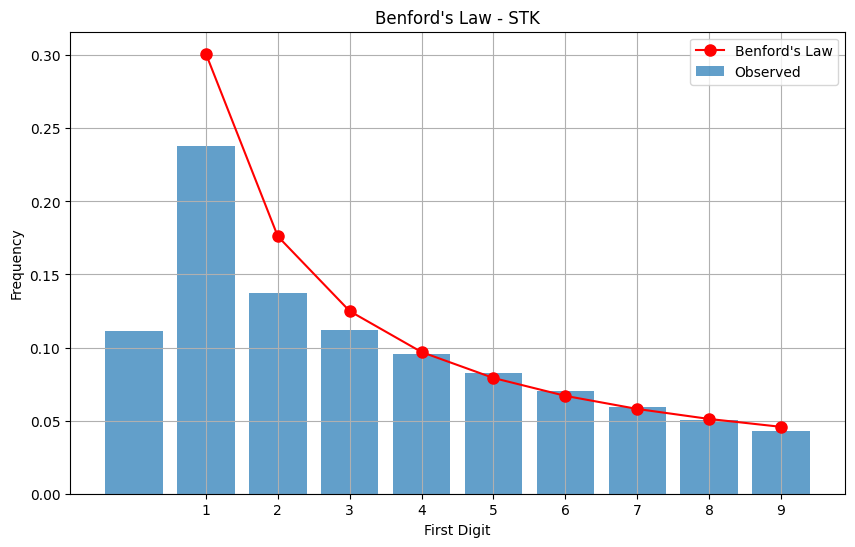

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função para extrair o primeiro dígito
def extract_first_digit(series):
    first_digits = series.apply(lambda x: int(str(x)[0]) if str(x)[0].isdigit() else None).dropna()
    return first_digits

# Função para plotar a distribuição dos primeiros dígitos
def plot_benford_law(df, title):
    amplitudes = df['amplitudes'].explode().dropna()  # Flatten the list of amplitudes and remove NaN values
    first_digits = extract_first_digit(pd.Series(amplitudes))
    digit_counts = first_digits.value_counts().sort_index()
    digit_counts = digit_counts / digit_counts.sum()  # Normalize to get probabilities

    benford_probs = np.log10(1 + 1 / np.arange(1, 10))

    plt.figure(figsize=(10, 6))
    plt.bar(digit_counts.index, digit_counts, alpha=0.7, label='Observed')
    plt.plot(np.arange(1, 10), benford_probs, 'ro-', label='Benford\'s Law', markersize=8)
    plt.title(f'Benford\'s Law - {title}')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(1, 10))
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar a Lei de Benford e plotar os gráficos
plot_benford_law(df_1, 'MIG')
plot_benford_law(df_2, 'STK')


In [ ]:
# O código acima funcionou muito bem porém não está normalizado. Agora vou fazer a mesma coisa normalizando:

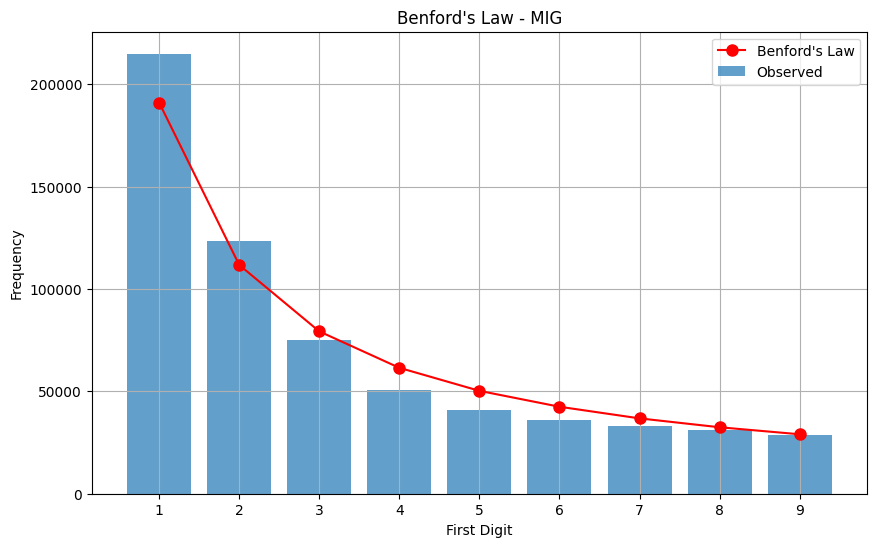

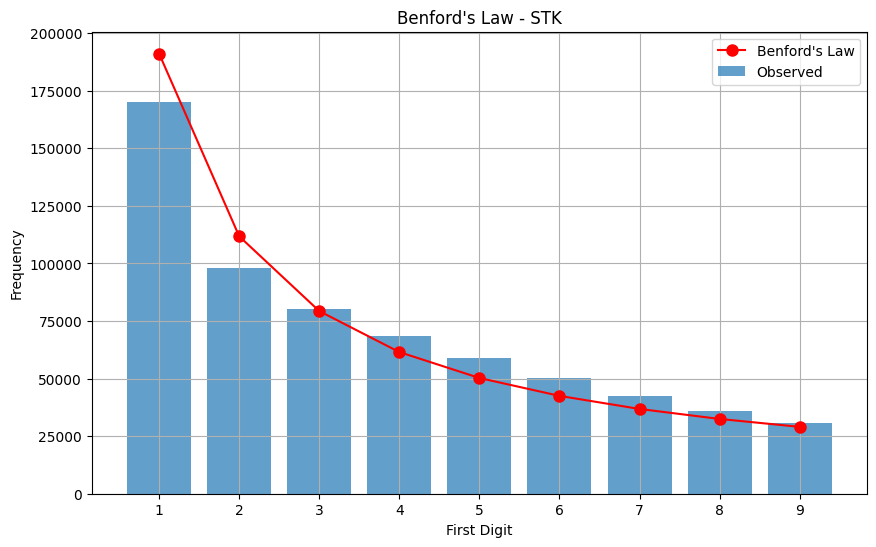

Chi-squared for MIG: 9334.316889456519, p-value: 0.0
Chi-squared for STK: 9064.920333397722, p-value: 0.0
The STK dataset is closer to Benford's Law distribution.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Função para extrair o primeiro dígito
def extract_first_digit(series):
    first_digits = series.apply(lambda x: int(str(x)[0]) if str(x)[0].isdigit() else None).dropna()
    return first_digits

# Função para calcular e plotar a distribuição dos primeiros dígitos
def plot_benford_law(df, title):
    amplitudes = df['amplitudes'].explode().dropna()  # Flatten the list of amplitudes and remove NaN values
    first_digits = extract_first_digit(pd.Series(amplitudes))
    digit_counts = first_digits.value_counts().sort_index()
    total_count = digit_counts.sum()

    benford_probs = np.log10(1 + 1 / np.arange(1, 10))
    expected_counts = benford_probs * total_count

    # Ajustar as frequências observadas para a soma total esperada
    observed = digit_counts.reindex(np.arange(1, 10), fill_value=0).values
    observed = observed * (expected_counts.sum() / observed.sum())

    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(1, 10), observed, alpha=0.7, label='Observed')
    plt.plot(np.arange(1, 10), expected_counts, 'ro-', label='Benford\'s Law', markersize=8)
    plt.title(f'Benford\'s Law - {title}')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(1, 10))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calcular o valor de qui-quadrado
    chi2, p_value = chisquare(observed, expected_counts)

    return chi2, p_value

# Aplicar a Lei de Benford e plotar os gráficos
chi2_mig, p_value_mig = plot_benford_law(df_1, 'MIG')
chi2_stk, p_value_stk = plot_benford_law(df_2, 'STK')

# Exibir os resultados
print(f"Chi-squared for MIG: {chi2_mig}, p-value: {p_value_mig}")
print(f"Chi-squared for STK: {chi2_stk}, p-value: {p_value_stk}")

if chi2_mig < chi2_stk:
    print("The MIG dataset is closer to Benford's Law distribution.")
else:
    print("The STK dataset is closer to Benford's Law distribution.")

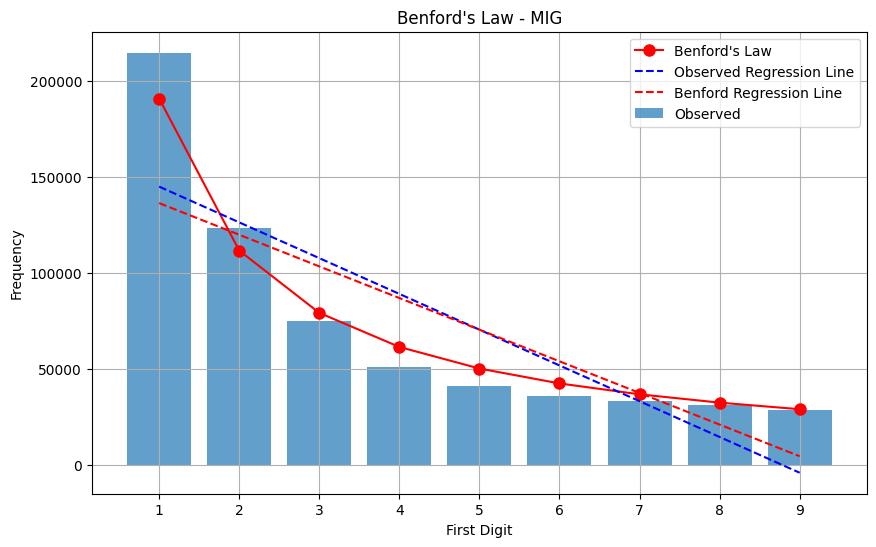

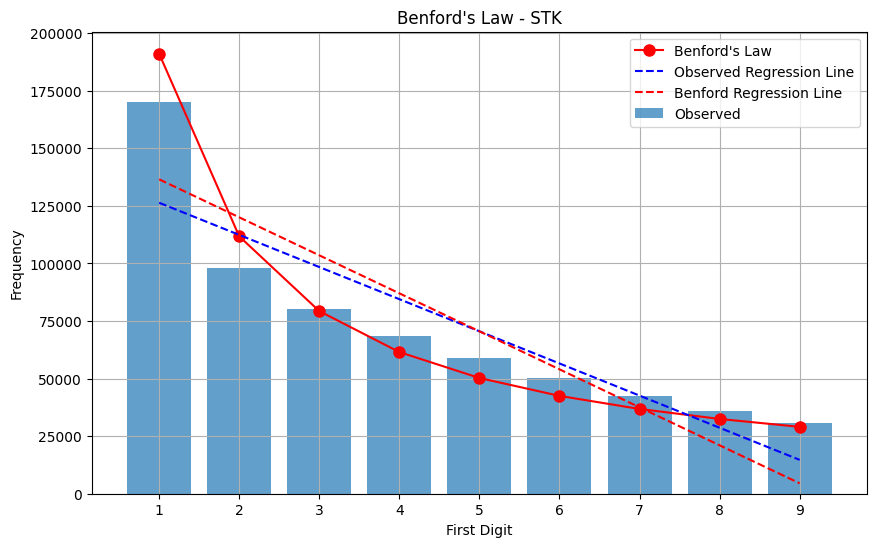

Chi-squared for MIG: 9334.316889456519, p-value: 0.0, angle: 0.0004008380113485654 degrees
Chi-squared for STK: 9064.920333397722, p-value: 0.0, angle: 0.0006329206697807181 degrees
The STK dataset is closer to Benford's Law distribution.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare, linregress

# Função para extrair o primeiro dígito
def extract_first_digit(series):
    first_digits = series.apply(lambda x: int(str(x)[0]) if str(x)[0].isdigit() else None).dropna()
    return first_digits

# Função para calcular e plotar a distribuição dos primeiros dígitos, com regressão linear
def plot_benford_law_with_regression(df, title):
    amplitudes = df['amplitudes'].explode().dropna()  # Flatten the list of amplitudes and remove NaN values
    first_digits = extract_first_digit(pd.Series(amplitudes))
    digit_counts = first_digits.value_counts().sort_index()
    total_count = digit_counts.sum()

    benford_probs = np.log10(1 + 1 / np.arange(1, 10))
    expected_counts = benford_probs * total_count

    # Ajustar as frequências observadas para a soma total esperada
    observed = digit_counts.reindex(np.arange(1, 10), fill_value=0).values
    observed = observed * (expected_counts.sum() / observed.sum())

    # Calcular regressão linear para a curva observada
    slope_obs, intercept_obs, _, _, _ = linregress(np.arange(1, 10), observed)
    regression_obs = slope_obs * np.arange(1, 10) + intercept_obs

    # Calcular regressão linear para a curva esperada
    slope_exp, intercept_exp, _, _, _ = linregress(np.arange(1, 10), expected_counts)
    regression_exp = slope_exp * np.arange(1, 10) + intercept_exp

    # Calcular o ângulo entre as duas linhas de regressão
    angle = np.arctan(abs((slope_obs - slope_exp) / (1 + slope_obs * slope_exp))) * (180 / np.pi)

    # Plotar as distribuições e as linhas de regressão
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(1, 10), observed, alpha=0.7, label='Observed')
    plt.plot(np.arange(1, 10), expected_counts, 'ro-', label='Benford\'s Law', markersize=8)
    plt.plot(np.arange(1, 10), regression_obs, 'b--', label='Observed Regression Line')
    plt.plot(np.arange(1, 10), regression_exp, 'r--', label='Benford Regression Line')
    plt.title(f'Benford\'s Law - {title}')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(1, 10))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calcular o valor de qui-quadrado
    chi2, p_value = chisquare(observed, expected_counts)

    return chi2, p_value, angle

# Aplicar a Lei de Benford, plotar os gráficos e calcular os ângulos
chi2_mig, p_value_mig, angle_mig = plot_benford_law_with_regression(df_1, 'MIG')
chi2_stk, p_value_stk, angle_stk = plot_benford_law_with_regression(df_2, 'STK')

# Exibir os resultados
print(f"Chi-squared for MIG: {chi2_mig}, p-value: {p_value_mig}, angle: {angle_mig} degrees")
print(f"Chi-squared for STK: {chi2_stk}, p-value: {p_value_stk}, angle: {angle_stk} degrees")

if chi2_mig < chi2_stk:
    print("The MIG dataset is closer to Benford's Law distribution.")
else:
    print("The STK dataset is closer to Benford's Law distribution.")

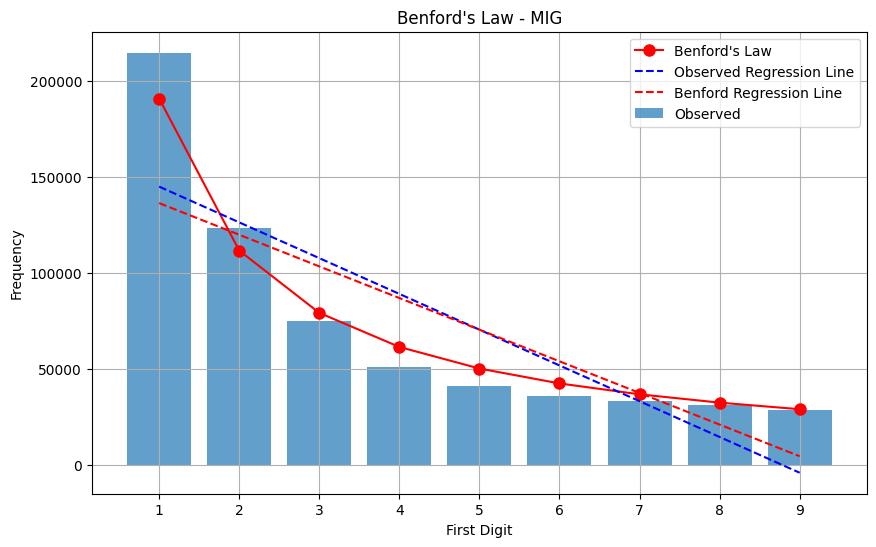

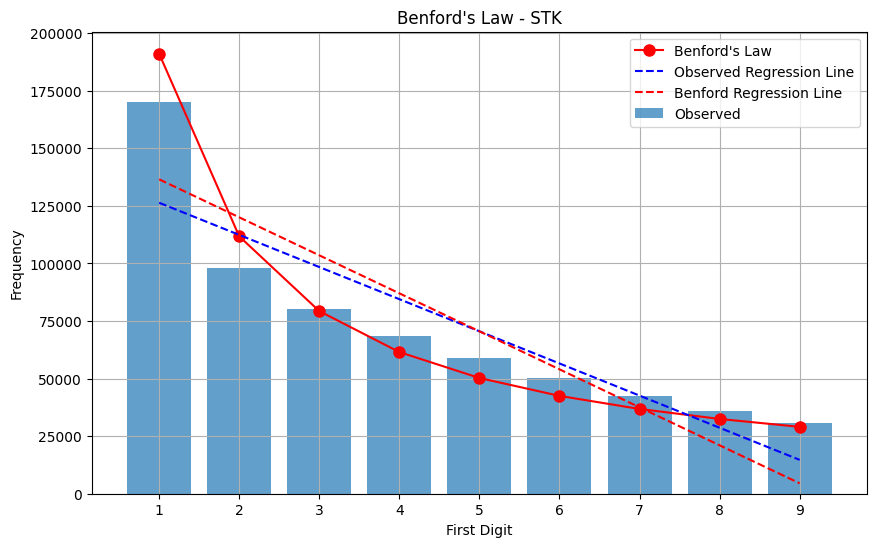

Chi-squared for MIG: 9334.316889456519, p-value: 0.0, angle: 0.0004008380113485654 degrees
Chi-squared for STK: 9064.920333397722, p-value: 0.0, angle: 0.0006329206697807181 degrees
The STK dataset is closer to Benford's Law distribution.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare, linregress

# Função para extrair o primeiro dígito
def extract_first_digit(series):
    first_digits = series.apply(lambda x: int(str(x)[0]) if str(x)[0].isdigit() else None).dropna()
    return first_digits

# Função para calcular e plotar a distribuição dos primeiros dígitos, com regressão linear
def plot_benford_law_with_regression(df, title):
    amplitudes = df['amplitudes'].explode().dropna()  # Flatten the list of amplitudes and remove NaN values
    first_digits = extract_first_digit(pd.Series(amplitudes))
    digit_counts = first_digits.value_counts().sort_index()
    total_count = digit_counts.sum()

    benford_probs = np.log10(1 + 1 / np.arange(1, 10))
    expected_counts = benford_probs * total_count

    # Ajustar as frequências observadas para a soma total esperada
    observed = digit_counts.reindex(np.arange(1, 10), fill_value=0).values
    observed = observed * (expected_counts.sum() / observed.sum())

    # Calcular regressão linear para a curva observada
    slope_obs, intercept_obs, _, _, _ = linregress(np.arange(1, 10), observed)
    regression_obs = slope_obs * np.arange(1, 10) + intercept_obs

    # Calcular regressão linear para a curva esperada (Benford)
    slope_exp, intercept_exp, _, _, _ = linregress(np.arange(1, 10), expected_counts)
    regression_exp = slope_exp * np.arange(1, 10) + intercept_exp

    # Calcular o ângulo entre as duas linhas de regressão
    angle = np.arctan(abs((slope_obs - slope_exp) / (1 + slope_obs * slope_exp))) * (180 / np.pi)

    # Plotar as distribuições e as linhas de regressão
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(1, 10), observed, alpha=0.7, label='Observed')
    plt.plot(np.arange(1, 10), expected_counts, 'ro-', label='Benford\'s Law', markersize=8)
    plt.plot(np.arange(1, 10), regression_obs, 'b--', label='Observed Regression Line')
    plt.plot(np.arange(1, 10), regression_exp, 'r--', label='Benford Regression Line')
    plt.title(f'Benford\'s Law - {title}')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(1, 10))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calcular o valor de qui-quadrado
    chi2, p_value = chisquare(observed, expected_counts)

    return chi2, p_value, angle

# Aplicar a Lei de Benford, plotar os gráficos e calcular os ângulos
chi2_mig, p_value_mig, angle_mig = plot_benford_law_with_regression(df_1, 'MIG')
chi2_stk, p_value_stk, angle_stk = plot_benford_law_with_regression(df_2, 'STK')

# Exibir os resultados
print(f"Chi-squared for MIG: {chi2_mig}, p-value: {p_value_mig}, angle: {angle_mig} degrees")
print(f"Chi-squared for STK: {chi2_stk}, p-value: {p_value_stk}, angle: {angle_stk} degrees")

if chi2_mig < chi2_stk:
    print("The MIG dataset is closer to Benford's Law distribution.")
else:
    print("The STK dataset is closer to Benford's Law distribution.")


In [16]:
df_1

,trace_number,amplitudes
0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
595,596,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
596,597,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
597,598,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
598,599,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Depuração para o dataset MIG:
Amplitude: 67.13787841796875, Second Digit: 7
Amplitude: -211.80430603027344, Second Digit: 1
Amplitude: -568.89599609375, Second Digit: 6
Amplitude: -907.7578125, Second Digit: 0
Amplitude: -1175.17041015625, Second Digit: 1
Amplitude: -1312.71435546875, Second Digit: 3
Amplitude: -1233.19091796875, Second Digit: 2
Amplitude: -893.355712890625, Second Digit: 9
Amplitude: -342.049560546875, Second Digit: 4
Amplitude: 406.782958984375, Second Digit: 0
Amplitude: 1245.9052734375, Second Digit: 2
Amplitude: 2061.89453125, Second Digit: 0
Amplitude: 2733.306884765625, Second Digit: 7
Amplitude: 3151.3388671875, Second Digit: 1
Amplitude: 3239.85400390625, Second Digit: 2
Amplitude: 2970.98828125, Second Digit: 9
Amplitude: 2372.841552734375, Second Digit: 3
Amplitude: 1527.3681640625, Second Digit: 5
Amplitude: 557.93798828125, Second Digit: 5
Amplitude: -390.739013671875, Second Digit: 9

Depuração para o dataset STK:
Amplitude: 352.763916015625, Second Digit

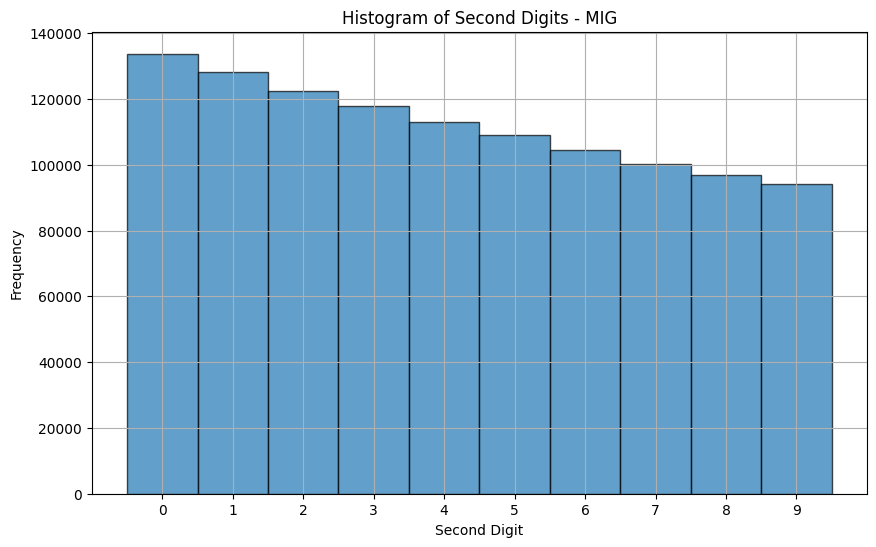

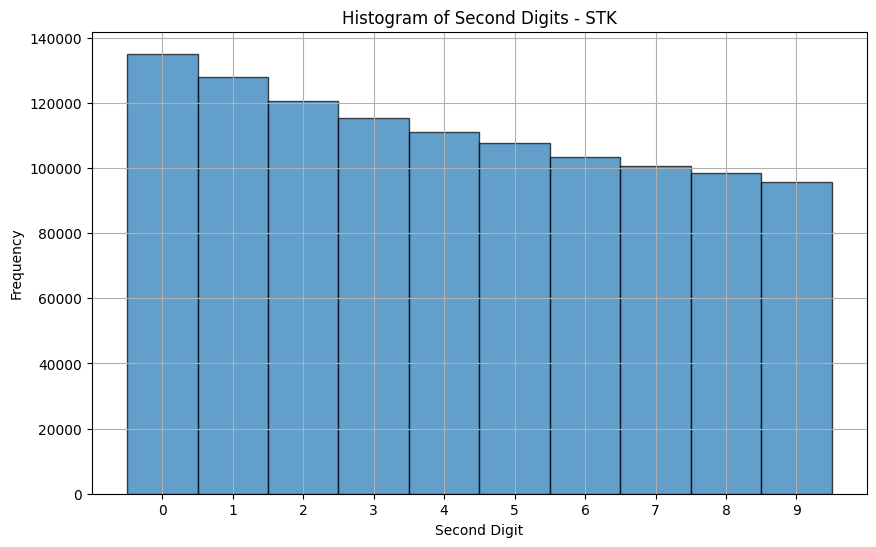

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função para extrair o segundo dígito
def extract_second_digit(value):
    if pd.isna(value) or value == 0:
        return None
    value_str = str(int(abs(value)))
    if len(value_str) > 1:
        return int(value_str[1])
    else:
        return None

# Função para criar novo dataset com segundos dígitos
def create_second_digit_dataset(df):
    amplitudes = df['amplitudes'].explode().dropna()
    amplitudes = amplitudes[amplitudes != 0]  # Filtrar valores zero

    # Adicionando depuração para entender a estrutura dos dados
    print("Estrutura dos dados de amplitudes após explode e filtragem de zeros:")
    print(amplitudes.head(20))

    second_digits = amplitudes.apply(lambda x: extract_second_digit(x)).dropna().astype(int)
    print("Second digits after extraction:")
    print(second_digits.head(20))

    # Ajuste para criação do DataFrame
    second_digits_df = pd.DataFrame(second_digits.values, columns=['second_digit'])
    return second_digits_df

# Adicionar depuração para verificar a extração dos segundos dígitos
def debug_second_digit_extraction(df):
    amplitudes = df['amplitudes'].explode().dropna()
    amplitudes = amplitudes[amplitudes != 0]  # Filtrar valores zero
    for amplitude in amplitudes.head(20):  # Limitar a depuração para as primeiras 20 amplitudes
        second_digit = extract_second_digit(amplitude)
        print(f'Amplitude: {amplitude}, Second Digit: {second_digit}')

# Verificar a extração dos segundos dígitos
print("Depuração para o dataset MIG:")
debug_second_digit_extraction(df_1)

print("\nDepuração para o dataset STK:")
debug_second_digit_extraction(df_2)

# Criar novo dataset com segundos dígitos para df_1 e df_2
df_1_second = create_second_digit_dataset(df_1)
df_2_second = create_second_digit_dataset(df_2)

# Exibir os novos datasets
print("\nSecond Digit Dataset for MIG:")
print(df_1_second.head(10))

print("\nSecond Digit Dataset for STK:")
print(df_2_second.head(10))

# Função para plotar histograma dos segundos dígitos
def plot_second_digit_histogram(df, title):
    if df.empty:
        print(f"No data available to plot for {title}")
        return

    plt.figure(figsize=(10, 6))
    plt.hist(df['second_digit'], bins=np.arange(-0.5, 10.5, 1), edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Second Digits - {title}')
    plt.xlabel('Second Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(10))
    plt.grid(True)
    plt.show()

# Plotar histogramas para os novos datasets
plot_second_digit_histogram(df_1_second, 'MIG')
plot_second_digit_histogram(df_2_second, 'STK')

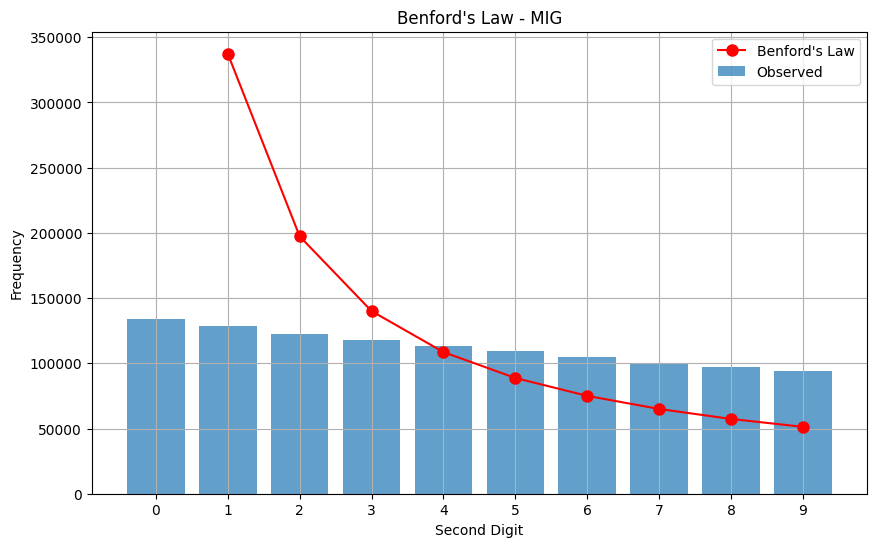

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.13556244001852522

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Função para calcular e plotar a Lei de Benford
def plot_benford_law(df, title):
    second_digits = df['second_digit']
    digit_counts = second_digits.value_counts().sort_index()
    total_count = digit_counts.sum()

    benford_probs = np.log10(1 + 1 / np.arange(1, 10))
    expected_counts = benford_probs * total_count

    # Plotar as distribuições e as linhas de regressão
    plt.figure(figsize=(10, 6))
    plt.bar(digit_counts.index, digit_counts, alpha=0.7, label='Observed')
    plt.plot(np.arange(1, 10), expected_counts, 'ro-', label='Benford\'s Law', markersize=8)
    plt.title(f'Benford\'s Law - {title}')
    plt.xlabel('Second Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(10))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calcular o valor de qui-quadrado
    observed = digit_counts.reindex(np.arange(1, 10), fill_value=0).values
    chi2, p_value = chisquare(observed, expected_counts)

    return chi2, p_value

# Aplicar a Lei de Benford e plotar os gráficos
chi2_mig, p_value_mig = plot_benford_law(df_1_second, 'MIG')
chi2_stk, p_value_stk = plot_benford_law(df_2_second, 'STK')

# Exibir os resultados
print(f"Chi-squared for MIG: {chi2_mig}, p-value: {p_value_mig}")
print(f"Chi-squared for STK: {chi2_stk}, p-value: {p_value_stk}")

if chi2_mig < chi2_stk:
    print("The MIG dataset is closer to Benford's Law distribution.")
else:
    print("The STK dataset is closer to Benford's Law distribution.")


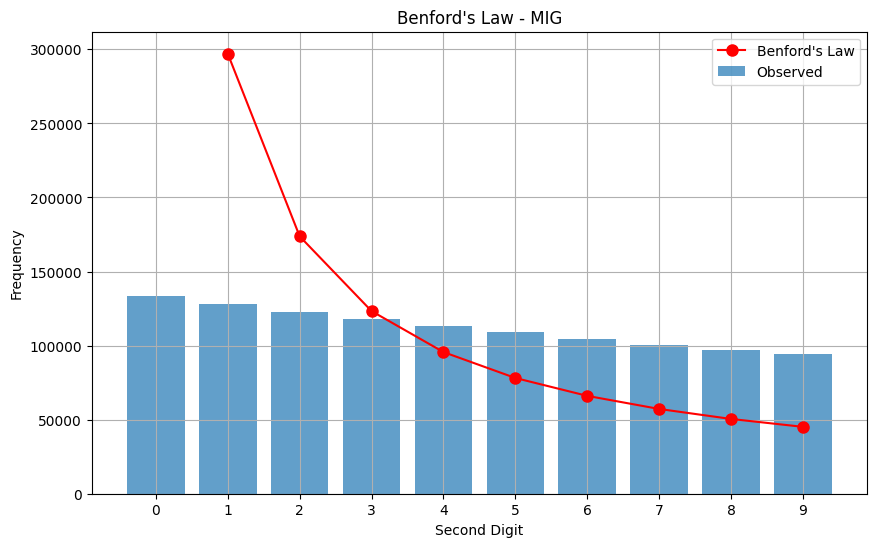

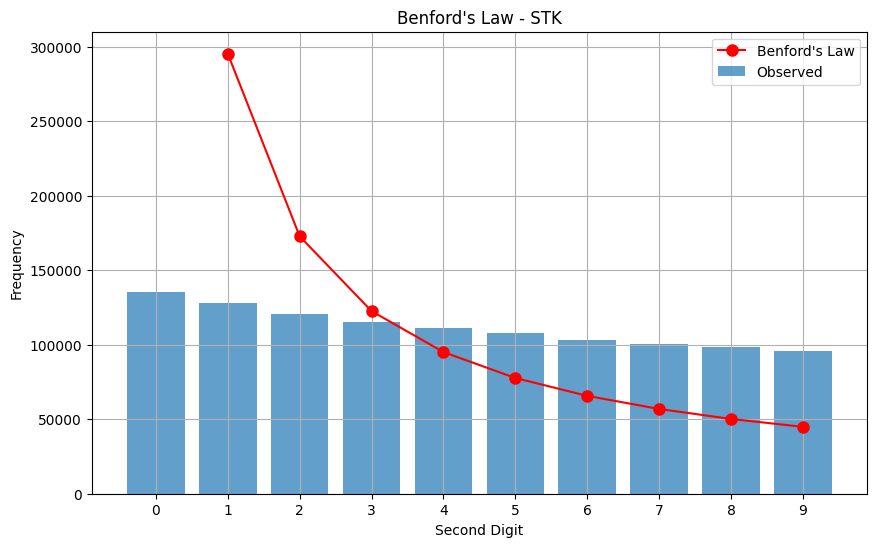

Chi-squared for MIG: 277646.6261901637, p-value: 0.0
Chi-squared for STK: 284632.54172204144, p-value: 0.0
The MIG dataset is closer to Benford's Law distribution.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Função para calcular e plotar a Lei de Benford
def plot_benford_law(df, title):
    second_digits = df['second_digit']
    digit_counts = second_digits.value_counts().sort_index()
    total_count = digit_counts.sum()

    benford_probs = np.log10(1 + 1 / np.arange(1, 10))
    expected_counts = benford_probs * total_count

    # Ajuste para garantir que as somas das frequências sejam iguais
    observed = digit_counts.reindex(np.arange(1, 10), fill_value=0).values
    expected_counts = expected_counts * (observed.sum() / expected_counts.sum())

    # Plotar as distribuições
    plt.figure(figsize=(10, 6))
    plt.bar(digit_counts.index, digit_counts, alpha=0.7, label='Observed')
    plt.plot(np.arange(1, 10), expected_counts, 'ro-', label='Benford\'s Law', markersize=8)
    plt.title(f'Benford\'s Law - {title}')
    plt.xlabel('Second Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(10))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calcular o valor de qui-quadrado
    chi2, p_value = chisquare(observed, expected_counts)

    return chi2, p_value

# Aplicar a Lei de Benford e plotar os gráficos
chi2_mig, p_value_mig = plot_benford_law(df_1_second, 'MIG')
chi2_stk, p_value_stk = plot_benford_law(df_2_second, 'STK')

# Exibir os resultados
print(f"Chi-squared for MIG: {chi2_mig}, p-value: {p_value_mig}")
print(f"Chi-squared for STK: {chi2_stk}, p-value: {p_value_stk}")

if chi2_mig < chi2_stk:
    print("The MIG dataset is closer to Benford's Law distribution.")
else:
    print("The STK dataset is closer to Benford's Law distribution.")

Campos do cabeçalho do primeiro arquivo:
LazyTraceHeaderAttribDict({'unpacked_header': b'\x00\x00\x00\x01\x00\x00\x00\x01\xff\xff\xff\xf2\x00\x00\x00\x01\xc1\xe0\x00\x00\x00\x00\x00\x1e\xff\xff\xff\xf2\x00\x01\x00\x01\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x01\x00\x064L\x00x\x83{\x00x\x84\n\x00\x063\xc1\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\xa0\x07\xd1\x07\xd0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00x\x84\n\x00\x063\xc1\x00\x00\x00\x03A\x10\x00\x00A\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e\x00\x00\x00\x1e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e\x00\x00\x00\x01\x00\x00\x00\x00\

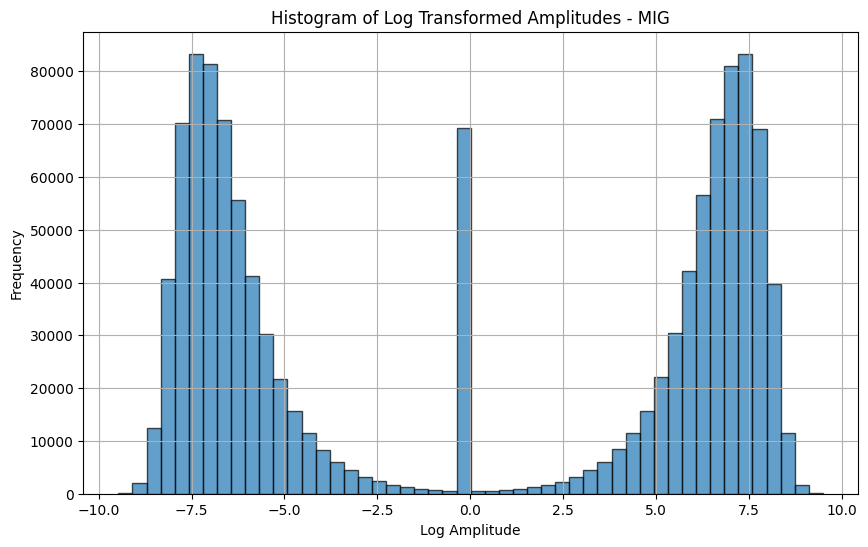

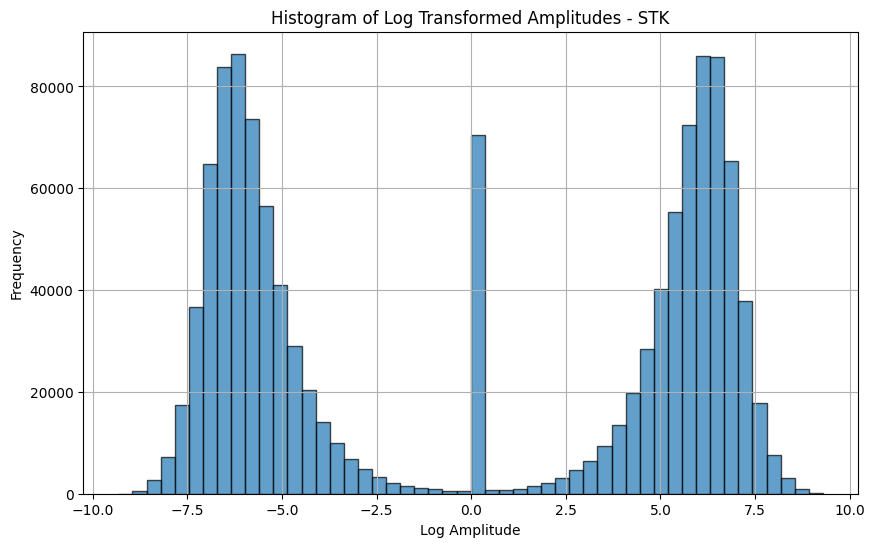

In [41]:
import obspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função para listar todos os campos disponíveis no cabeçalho
def list_header_fields(file_path):
    stream = obspy.read(file_path, format='SEGY')
    for trace in stream:
        header = trace.stats.segy.trace_header
        print(header)
        break  # Imprimir apenas o primeiro cabeçalho para referência

# Função para ler arquivo SEGY e extrair amplitudes
def read_segy(file_path):
    stream = obspy.read(file_path, format='SEGY')
    data = []
    for trace in stream:
        header = trace.stats.segy.trace_header
        trace_data = {
            "trace_number": header.trace_sequence_number_within_line,
            "amplitudes": trace.data
        }
        data.append(trace_data)
    return pd.DataFrame(data)

# Função para aplicar a transformação logarítmica natural
def apply_log_transform(value):
    if value > 0:
        return np.log(value)
    elif value < 0:
        return -np.log(-value)
    else:
        return 0  # Mantemos zero em vez de NaN para log(0)

# Função para aplicar a transformação logarítmica natural ao dataset
def transform_amplitudes(df):
    df['log_amplitudes'] = df['amplitudes'].apply(lambda amplitudes: [apply_log_transform(val) for val in amplitudes])
    return df

# Caminhos dos arquivos
file_path_1 = '/content/0057_ESPIRITO_SANTO_39.0057-0212.MIG_FIN.57.sgy'
file_path_2 = '/content/0057_ESPIRITO_SANTO_39.0057-0212.STK_FIN.22.sgy'

# Listar campos do cabeçalho disponíveis
print("Campos do cabeçalho do primeiro arquivo:")
list_header_fields(file_path_1)

print("Campos do cabeçalho do segundo arquivo:")
list_header_fields(file_path_2)

# Ler arquivos SEGY e criar dataframes
df_1 = read_segy(file_path_1)
df_2 = read_segy(file_path_2)

# Exibir os dataframes originais
print("DataFrame do primeiro arquivo (MIG):")
print(df_1.head())

print("DataFrame do segundo arquivo (STK):")
print(df_2.head())

# Aplicar a transformação logarítmica natural às amplitudes
df_1_transformed = transform_amplitudes(df_1)
df_2_transformed = transform_amplitudes(df_2)

# Exibir os novos dataframes com as amplitudes transformadas
print("DataFrame transformado do primeiro arquivo (MIG):")
print(df_1_transformed.head())

print("DataFrame transformado do segundo arquivo (STK):")
print(df_2_transformed.head())

# Função para verificar valores não zero nas amplitudes originais
def check_non_zero_amplitudes(df):
    non_zero_amplitudes = df['amplitudes'].apply(lambda amplitudes: [val for val in amplitudes if val != 0])
    return non_zero_amplitudes

# Verificar valores não zero nas amplitudes
print("Verificação de amplitudes não zero no primeiro arquivo (MIG):")
print(check_non_zero_amplitudes(df_1).head())

print("Verificação de amplitudes não zero no segundo arquivo (STK):")
print(check_non_zero_amplitudes(df_2).head())

# Plotar histogramas dos valores transformados
def plot_histogram(log_amplitudes, title):
    flattened_log_amplitudes = [item for sublist in log_amplitudes for item in sublist]
    plt.figure(figsize=(10, 6))
    plt.hist(flattened_log_amplitudes, bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Log Transformed Amplitudes - {title}')
    plt.xlabel('Log Amplitude')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plotar histogramas para os datasets transformados
plot_histogram(df_1_transformed['log_amplitudes'], 'MIG')
plot_histogram(df_2_transformed['log_amplitudes'], 'STK')

Campos do cabeçalho do primeiro arquivo:
LazyTraceHeaderAttribDict({'unpacked_header': b'\x00\x00\x00\x01\x00\x00\x00\x01\xff\xff\xff\xf2\x00\x00\x00\x01\xc1\xe0\x00\x00\x00\x00\x00\x1e\xff\xff\xff\xf2\x00\x01\x00\x01\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x01\x00\x064L\x00x\x83{\x00x\x84\n\x00\x063\xc1\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\xa0\x07\xd1\x07\xd0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00x\x84\n\x00\x063\xc1\x00\x00\x00\x03A\x10\x00\x00A\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e\x00\x00\x00\x1e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e\x00\x00\x00\x01\x00\x00\x00\x00\

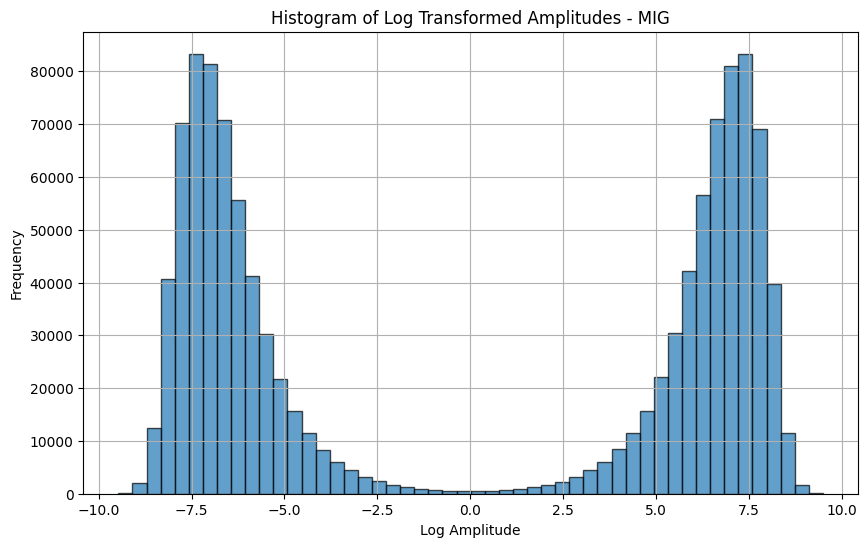

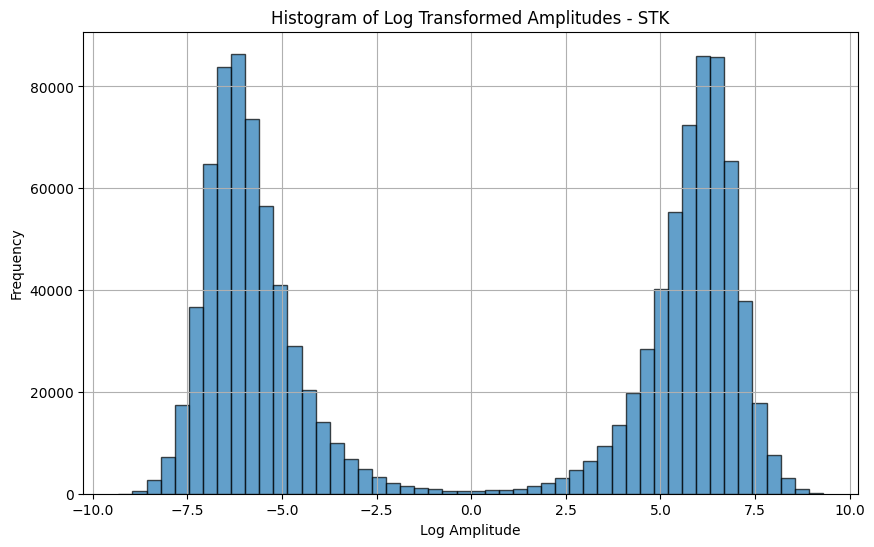

Distribuição dos primeiros dígitos no primeiro arquivo (MIG):
Series([], Name: count, dtype: int64)
Distribuição dos primeiros dígitos no segundo arquivo (STK):
Series([], Name: count, dtype: int64)


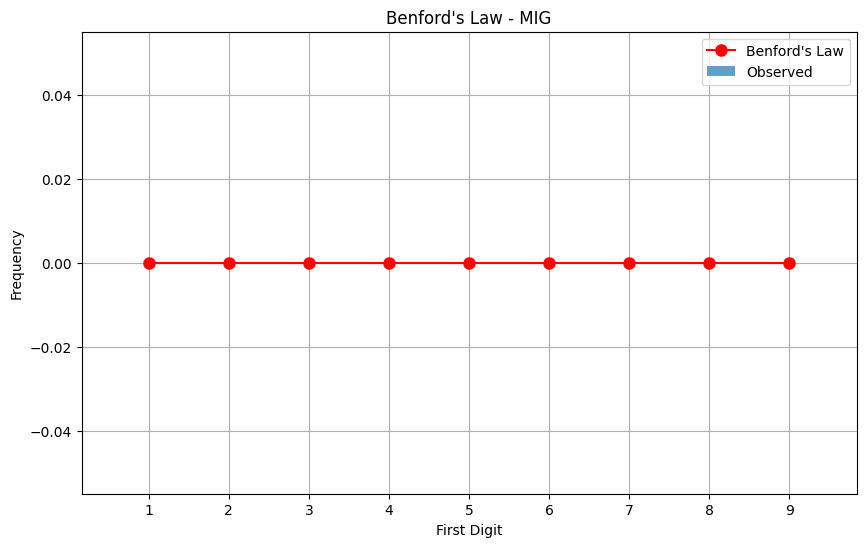

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8064: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


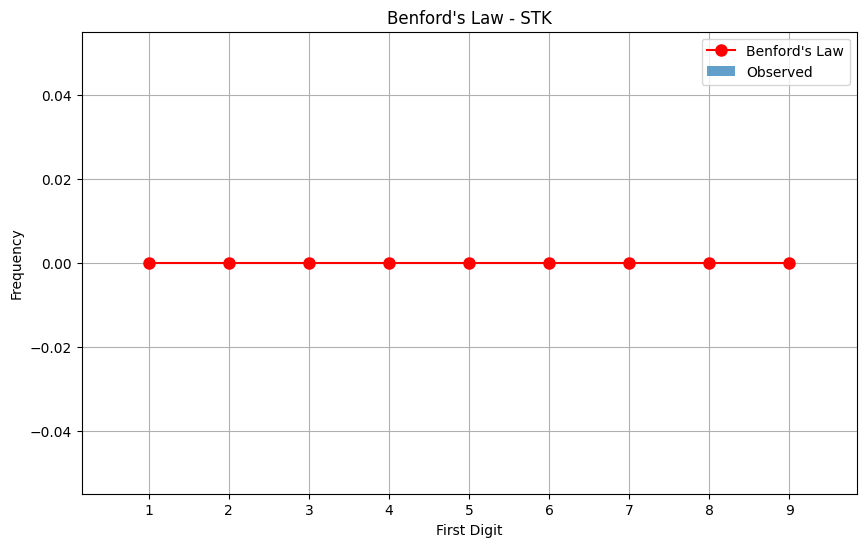

Chi-squared for MIG: nan, p-value: nan
Chi-squared for STK: nan, p-value: nan
The STK dataset is closer to Benford's Law distribution.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8064: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [42]:
import obspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Função para listar todos os campos disponíveis no cabeçalho
def list_header_fields(file_path):
    stream = obspy.read(file_path, format='SEGY')
    for trace in stream:
        header = trace.stats.segy.trace_header
        print(header)
        break  # Imprimir apenas o primeiro cabeçalho para referência

# Função para ler arquivo SEGY e extrair amplitudes
def read_segy(file_path):
    stream = obspy.read(file_path, format='SEGY')
    data = []
    for trace in stream:
        header = trace.stats.segy.trace_header
        trace_data = {
            "trace_number": header.trace_sequence_number_within_line,
            "amplitudes": trace.data
        }
        data.append(trace_data)
    return pd.DataFrame(data)

# Função para aplicar a transformação logarítmica natural
def apply_log_transform(value):
    if value > 0:
        return np.log(value)
    elif value < 0:
        return -np.log(-value)
    else:
        return None  # Excluímos valores zero para evitar problemas na extração de dígitos

# Função para transformar amplitudes
def transform_amplitudes(df):
    df['log_amplitudes'] = df['amplitudes'].apply(lambda amplitudes: [apply_log_transform(val) for val in amplitudes if apply_log_transform(val) is not None])
    return df

# Função para extrair o primeiro dígito de um valor
def extract_first_digit(value):
    return int(str(value).lstrip('-0.')[0])

# Função para criar um dataframe com os primeiros dígitos
def create_first_digit_dataframe(df):
    log_amplitudes = df['log_amplitudes'].explode().dropna()
    first_digits = log_amplitudes.apply(lambda x: extract_first_digit(abs(x)))
    return pd.DataFrame(first_digits, columns=['first_digit'])

# Função para calcular a distribuição esperada pela Lei de Benford
def benford_distribution(n=1):
    return [np.log10(1 + 1/d) for d in range(1, 10)]

# Função para plotar a distribuição dos primeiros dígitos e a distribuição esperada
def plot_benford_law(first_digits, title):
    digit_counts = first_digits['first_digit'].value_counts().sort_index()
    total_count = digit_counts.sum()

    benford_probs = benford_distribution()
    expected_counts = [p * total_count for p in benford_probs]

    observed = digit_counts.reindex(range(1, 10), fill_value=0).values

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), observed, alpha=0.7, label='Observed')
    plt.plot(range(1, 10), expected_counts, 'ro-', label='Benford\'s Law', markersize=8)
    plt.title(f'Benford\'s Law - {title}')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 10))
    plt.legend()
    plt.grid(True)
    plt.show()

    chi2, p_value = chisquare(observed, expected_counts)

    return chi2, p_value

# Caminhos dos arquivos
file_path_1 = '/content/0057_ESPIRITO_SANTO_39.0057-0212.MIG_FIN.57.sgy'
file_path_2 = '/content/0057_ESPIRITO_SANTO_39.0057-0212.STK_FIN.22.sgy'

# Listar campos do cabeçalho disponíveis
print("Campos do cabeçalho do primeiro arquivo:")
list_header_fields(file_path_1)

print("Campos do cabeçalho do segundo arquivo:")
list_header_fields(file_path_2)

# Ler arquivos SEGY e criar dataframes
df_1 = read_segy(file_path_1)
df_2 = read_segy(file_path_2)

# Exibir os dataframes originais
print("DataFrame do primeiro arquivo (MIG):")
print(df_1.head())

print("DataFrame do segundo arquivo (STK):")
print(df_2.head())

# Aplicar a transformação logarítmica natural às amplitudes
df_1_transformed = transform_amplitudes(df_1)
df_2_transformed = transform_amplitudes(df_2)

# Exibir os novos dataframes com as amplitudes transformadas
print("DataFrame transformado do primeiro arquivo (MIG):")
print(df_1_transformed.head())

print("DataFrame transformado do segundo arquivo (STK):")
print(df_2_transformed.head())

# Função para verificar valores não zero nas amplitudes originais
def check_non_zero_amplitudes(df):
    non_zero_amplitudes = df['amplitudes'].apply(lambda amplitudes: [val for val in amplitudes if val != 0])
    return non_zero_amplitudes

# Verificar valores não zero nas amplitudes
print("Verificação de amplitudes não zero no primeiro arquivo (MIG):")
print(check_non_zero_amplitudes(df_1).head())

print("Verificação de amplitudes não zero no segundo arquivo (STK):")
print(check_non_zero_amplitudes(df_2).head())

# Plotar histogramas dos valores transformados
def plot_histogram(log_amplitudes, title):
    flattened_log_amplitudes = [item for sublist in log_amplitudes for item in sublist]
    plt.figure(figsize=(10, 6))
    plt.hist(flattened_log_amplitudes, bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Log Transformed Amplitudes - {title}')
    plt.xlabel('Log Amplitude')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plotar histogramas para os datasets transformados
plot_histogram(df_1_transformed['log_amplitudes'], 'MIG')
plot_histogram(df_2_transformed['log_amplitudes'], 'STK')

# Criar dataframes com os primeiros dígitos
df_1_first_digits = create_first_digit_dataframe(df_1_transformed)
df_2_first_digits = create_first_digit_dataframe(df_2_transformed)

# Verificar a distribuição dos primeiros dígitos
print("Distribuição dos primeiros dígitos no primeiro arquivo (MIG):")
print(df_1_first_digits['first_digit'].value_counts().sort_index())

print("Distribuição dos primeiros dígitos no segundo arquivo (STK):")
print(df_2_first_digits['first_digit'].value_counts().sort_index())

# Aplicar a Lei de Benford e plotar os gráficos para os primeiros dígitos
chi2_mig, p_value_mig = plot_benford_law(df_1_first_digits, 'MIG')
chi2_stk, p_value_stk = plot_benford_law(df_2_first_digits, 'STK')

# Exibir os resultados
print(f"Chi-squared for MIG: {chi2_mig}, p-value: {p_value_mig}")
print(f"Chi-squared for STK: {chi2_stk}, p-value: {p_value_stk}")

if chi2_mig < chi2_stk:
    print("The MIG dataset is closer to Benford's Law distribution.")
else:
    print("The STK dataset is closer to Benford's Law distribution.")

In [43]:
df_1_transformed

,trace_number,amplitudes,log_amplitudes
0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.2067485, -5.355663, -6.3436975, -6.8109775,..."
1,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-7.708943, -7.902055, -7.945505, -7.824746, -..."
2,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.770812, -5.394021, 6.23124, 7.08235, 7.400..."
3,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.7737265, 7.1158648, 7.2969084, 7.342072, 7...."
4,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-7.3725734, -7.157376, -6.48136, 5.26635, 7.0..."
...,...,...,...
595,596,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-7.7597017, -7.839347, -7.8025365, -7.6010528..."
596,597,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.8111243, 7.2489443, 7.4827294, 7.585716, 7...."
597,598,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-5.6562614, -5.840411, -5.877639, -5.7657804,..."
598,599,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.964976, 6.928764, 6.6670327, 5.836997, -5.6..."


Campos do cabeçalho do primeiro arquivo:
LazyTraceHeaderAttribDict({'unpacked_header': b'\x00\x00\x00\x01\x00\x00\x00\x01\xff\xff\xff\xf2\x00\x00\x00\x01\xc1\xe0\x00\x00\x00\x00\x00\x1e\xff\xff\xff\xf2\x00\x01\x00\x01\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x01\x00\x064L\x00x\x83{\x00x\x84\n\x00\x063\xc1\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\xa0\x07\xd1\x07\xd0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00x\x84\n\x00\x063\xc1\x00\x00\x00\x03A\x10\x00\x00A\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e\x00\x00\x00\x1e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e\x00\x00\x00\x01\x00\x00\x00\x00\

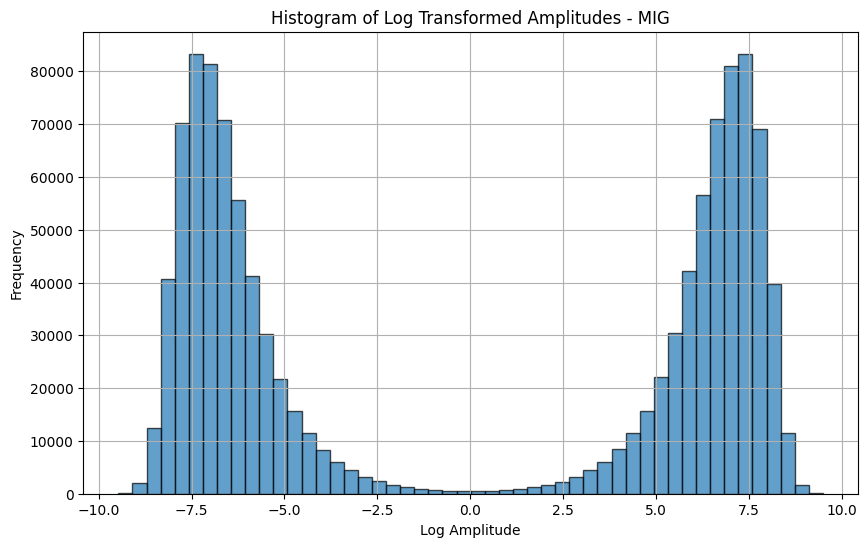

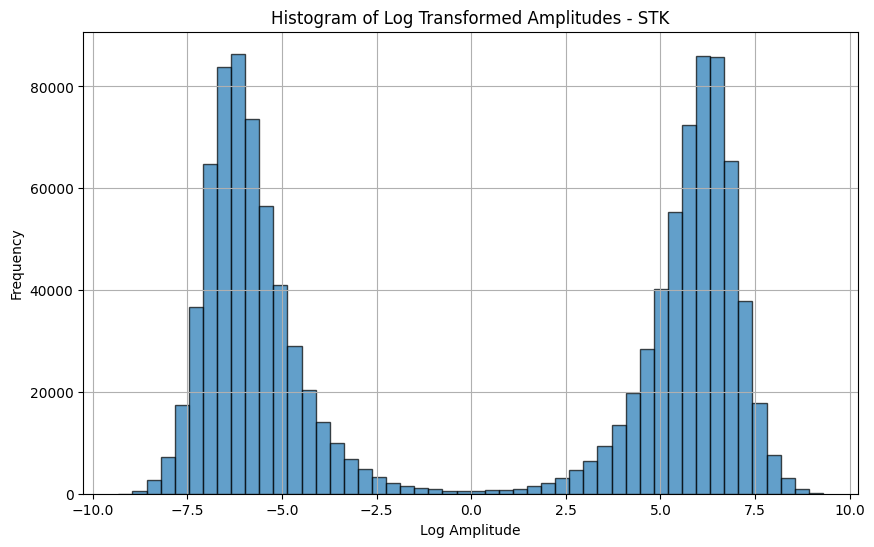

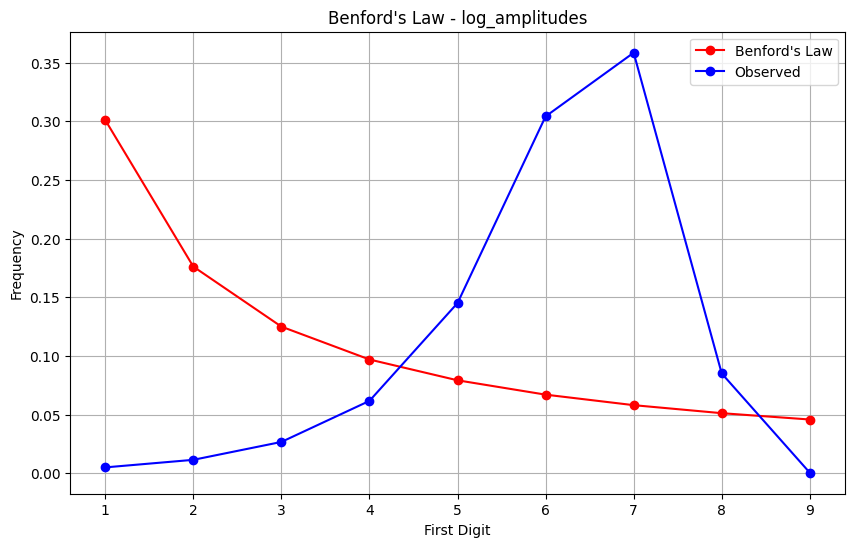

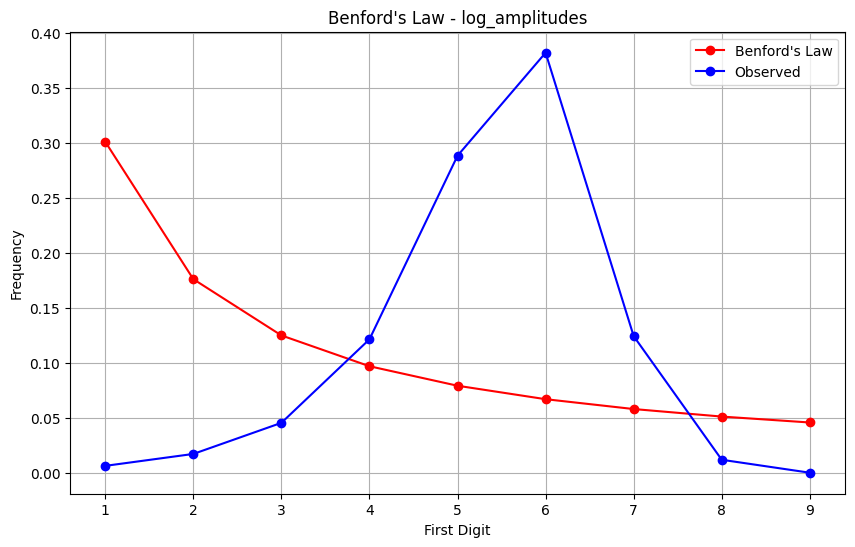

Chi-squared for MIG: 0.9434641766899502, p-value: 0.9985809500948883
Chi-squared for STK: 0.8872168664208667, p-value: 0.9988654299391034


In [46]:
import obspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Função para listar todos os campos disponíveis no cabeçalho
def list_header_fields(file_path):
    stream = obspy.read(file_path, format='SEGY')
    for trace in stream:
        header = trace.stats.segy.trace_header
        print(header)
        break  # Imprimir apenas o primeiro cabeçalho para referência

# Função para ler arquivo SEGY e extrair amplitudes
def read_segy(file_path):
    stream = obspy.read(file_path, format='SEGY')
    data = []
    for trace in stream:
        header = trace.stats.segy.trace_header
        trace_data = {
            "trace_number": header.trace_sequence_number_within_line,
            "amplitudes": trace.data
        }
        data.append(trace_data)
    return pd.DataFrame(data)

# Função para aplicar a transformação logarítmica natural
def apply_log_transform(value):
    if value > 0:
        return np.log(value)
    elif value < 0:
        return -np.log(-value)
    else:
        return None  # Manter zero como None para excluir dos gráficos

# Função para aplicar a transformação logarítmica natural ao dataset
def transform_amplitudes(df):
    df['log_amplitudes'] = df['amplitudes'].apply(lambda amplitudes: [apply_log_transform(val) for val in amplitudes])
    return df

# Função para extrair o primeiro dígito
def extract_first_digit(value):
    if value is None:
        return None
    return int(str(value).lstrip('-')[0])

# Função para aplicar a Lei de Benford
def benford_law(df, column_name):
    all_digits = []
    for sublist in df[column_name]:
        all_digits.extend([extract_first_digit(val) for val in sublist if extract_first_digit(val) is not None])

    benford_dist = [np.log10(1 + 1/d) for d in range(1, 10)]
    observed_dist = [all_digits.count(d) / len(all_digits) for d in range(1, 10)]

    chi2_stat, p_value = chi2_contingency([observed_dist, benford_dist])[:2]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 10), benford_dist, 'ro-', label="Benford's Law")
    plt.plot(range(1, 10), observed_dist, 'bo-', label="Observed")
    plt.title(f"Benford's Law - {column_name}")
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

    return chi2_stat, p_value

# Caminhos dos arquivos
file_path_1 = '/content/0057_ESPIRITO_SANTO_39.0057-0212.MIG_FIN.57.sgy'
file_path_2 = '/content/0057_ESPIRITO_SANTO_39.0057-0212.STK_FIN.22.sgy'

# Listar campos do cabeçalho disponíveis
print("Campos do cabeçalho do primeiro arquivo:")
list_header_fields(file_path_1)

print("Campos do cabeçalho do segundo arquivo:")
list_header_fields(file_path_2)

# Ler arquivos SEGY e criar dataframes
df_1 = read_segy(file_path_1)
df_2 = read_segy(file_path_2)

# Exibir os dataframes originais
print("DataFrame do primeiro arquivo (MIG):")
print(df_1.head())

print("DataFrame do segundo arquivo (STK):")
print(df_2.head())

# Aplicar a transformação logarítmica natural às amplitudes
df_1_transformed = transform_amplitudes(df_1)
df_2_transformed = transform_amplitudes(df_2)

# Exibir os novos dataframes com as amplitudes transformadas
print("DataFrame transformado do primeiro arquivo (MIG):")
print(df_1_transformed.head())

print("DataFrame transformado do segundo arquivo (STK):")
print(df_2_transformed.head())

# Função para verificar valores não zero nas amplitudes originais
def check_non_zero_amplitudes(df):
    non_zero_amplitudes = df['amplitudes'].apply(lambda amplitudes: [val for val in amplitudes if val != 0])
    return non_zero_amplitudes

# Verificar valores não zero nas amplitudes
print("Verificação de amplitudes não zero no primeiro arquivo (MIG):")
print(check_non_zero_amplitudes(df_1).head())

print("Verificação de amplitudes não zero no segundo arquivo (STK):")
print(check_non_zero_amplitudes(df_2).head())

# Plotar histogramas dos valores transformados
def plot_histogram(log_amplitudes, title):
    flattened_log_amplitudes = [item for sublist in log_amplitudes for item in sublist if item is not None]
    plt.figure(figsize=(10, 6))
    plt.hist(flattened_log_amplitudes, bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Log Transformed Amplitudes - {title}')
    plt.xlabel('Log Amplitude')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plotar histogramas para os datasets transformados
plot_histogram(df_1_transformed['log_amplitudes'], 'MIG')
plot_histogram(df_2_transformed['log_amplitudes'], 'STK')

# Aplicar a Lei de Benford e plotar os gráficos
chi2_mig, p_value_mig = benford_law(df_1_transformed, 'log_amplitudes')
chi2_stk, p_value_stk = benford_law(df_2_transformed, 'log_amplitudes')

print(f"Chi-squared for MIG: {chi2_mig}, p-value: {p_value_mig}")
print(f"Chi-squared for STK: {chi2_stk}, p-value: {p_value_stk}")

In [6]:
import numpy as np
import pandas as pd
import time

# Configurações do pêndulo
max_angle = 9  # graus
min_angle = -9  # graus
time_interval = 0.2  # segundos
total_duration = 1 * 60  # 1 minuto em segundos

# Inicializando o registro de amplitudes
amplitudes = []
timestamps = []

# Função para simular o movimento do pêndulo
def simulate_pendulum():
    current_angle = 0
    while True:
        new_angle = np.random.uniform(min_angle, max_angle)
        yield new_angle
        time.sleep(time_interval)

# Simulando o pêndulo e registrando as amplitudes
start_time = time.time()
pendulum = simulate_pendulum()

while (time.time() - start_time) < total_duration:
    amplitude = next(pendulum)
    amplitudes.append(amplitude)
    timestamps.append(time.time() - start_time)

# Criando o DataFrame
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Amplitude': amplitudes
})

# Calculando as médias randômicas das amplitudes
df['Random_Average'] = df['Amplitude'].rolling(window=5).mean()

# Exibindo o DataFrame
print(df)

# Salvando o DataFrame em um arquivo CSV
df.to_csv('pendulum_data.csv', index=False)

print("Simulação concluída. Dados salvos em 'pendulum_data.csv'.")

     Timestamp  Amplitude  Random_Average
0     0.000274  -2.941068             NaN
1     0.200670  -7.586250             NaN
2     0.401013  -4.194384             NaN
3     0.601424   8.049121             NaN
4     0.801824  -8.625130       -3.059542
..         ...        ...             ...
296  59.324424   2.770251        1.350288
297  59.524888  -6.195081        1.313639
298  59.725352   7.025142        2.455969
299  59.925762   7.951691        3.475753
300  60.126201   7.674049        3.845210

[301 rows x 3 columns]
Simulação concluída. Dados salvos em 'pendulum_data.csv'.


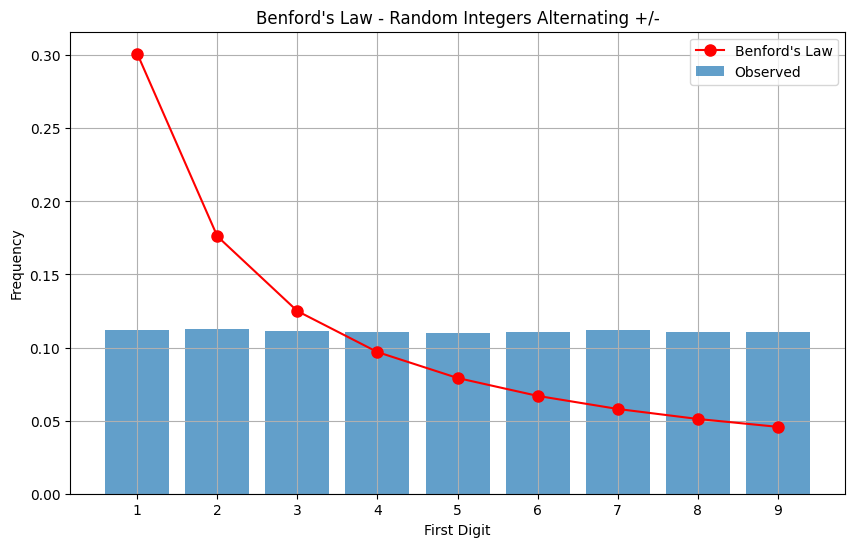

       Values
0     -772543
1      632319
2     -479853
3       82473
4     -188030
...       ...
99995  867540
99996 -539946
99997  251976
99998 -100472
99999  220742

[100000 rows x 1 columns]


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gerar 100000 valores aleatórios inteiros alternando entre positivos e negativos
random_values = np.random.randint(1, 1_000_000, size=100_000)  # valores inteiros aleatórios
random_values[::2] *= -1  # alternar entre positivo e negativo

# Criar um DataFrame com os valores gerados
df = pd.DataFrame(random_values, columns=['Values'])

# Função para extrair o primeiro dígito
def extract_first_digit(series):
    first_digits = series.apply(lambda x: int(str(abs(x))[0]) if str(abs(x))[0].isdigit() else None).dropna()
    return first_digits

# Função para plotar a distribuição dos primeiros dígitos
def plot_benford_law(df, column, title):
    values = df[column].dropna()
    first_digits = extract_first_digit(pd.Series(values))
    digit_counts = first_digits.value_counts().sort_index()
    digit_counts = digit_counts / digit_counts.sum()  # Normalize to get probabilities

    benford_probs = np.log10(1 + 1 / np.arange(1, 10))

    plt.figure(figsize=(10, 6))
    plt.bar(digit_counts.index, digit_counts, alpha=0.7, label='Observed')
    plt.plot(np.arange(1, 10), benford_probs, 'ro-', label='Benford\'s Law', markersize=8)
    plt.title(f'Benford\'s Law - {title}')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(1, 10))
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar a Lei de Benford e plotar os gráficos para os valores gerados
plot_benford_law(df, 'Values', 'Random Integers Alternating +/-')

# Mostrar o DataFrame
print(df)

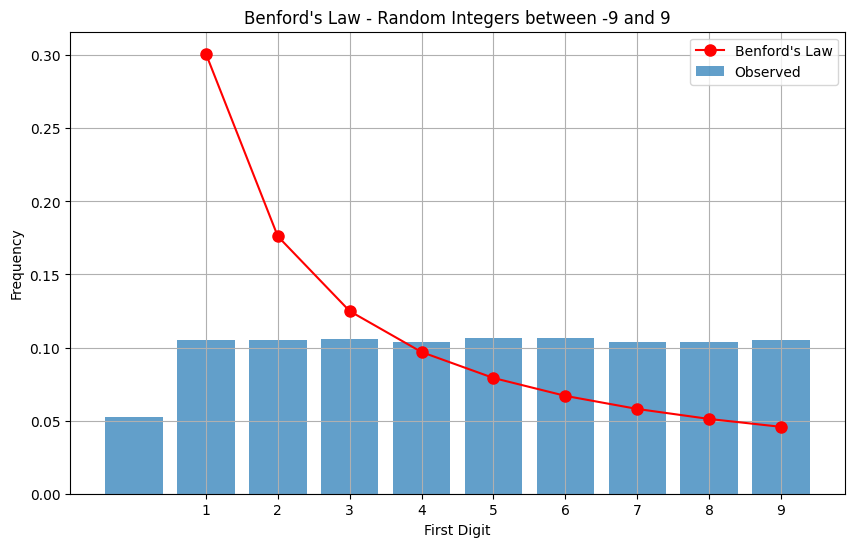

       Values
0          -8
1          -6
2           6
3           6
4          -1
...       ...
99995      -2
99996      -2
99997      -2
99998      -4
99999       6

[100000 rows x 1 columns]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gerar 100000 valores aleatórios inteiros entre -9 e +9
random_values = np.random.randint(-9, 10, size=100_000)

# Criar um DataFrame com os valores gerados
df = pd.DataFrame(random_values, columns=['Values'])

# Função para extrair o primeiro dígito
def extract_first_digit(series):
    first_digits = series.apply(lambda x: int(str(abs(x))[0]) if str(abs(x))[0].isdigit() else None).dropna()
    return first_digits

# Função para plotar a distribuição dos primeiros dígitos
def plot_benford_law(df, column, title):
    values = df[column].dropna()
    first_digits = extract_first_digit(pd.Series(values))
    digit_counts = first_digits.value_counts().sort_index()
    digit_counts = digit_counts / digit_counts.sum()  # Normalize to get probabilities

    benford_probs = np.log10(1 + 1 / np.arange(1, 10))

    plt.figure(figsize=(10, 6))
    plt.bar(digit_counts.index, digit_counts, alpha=0.7, label='Observed')
    plt.plot(np.arange(1, 10), benford_probs, 'ro-', label='Benford\'s Law', markersize=8)
    plt.title(f'Benford\'s Law - {title}')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(1, 10))
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar a Lei de Benford e plotar os gráficos para os valores gerados
plot_benford_law(df, 'Values', 'Random Integers between -9 and 9')

# Mostrar o DataFrame
print(df)


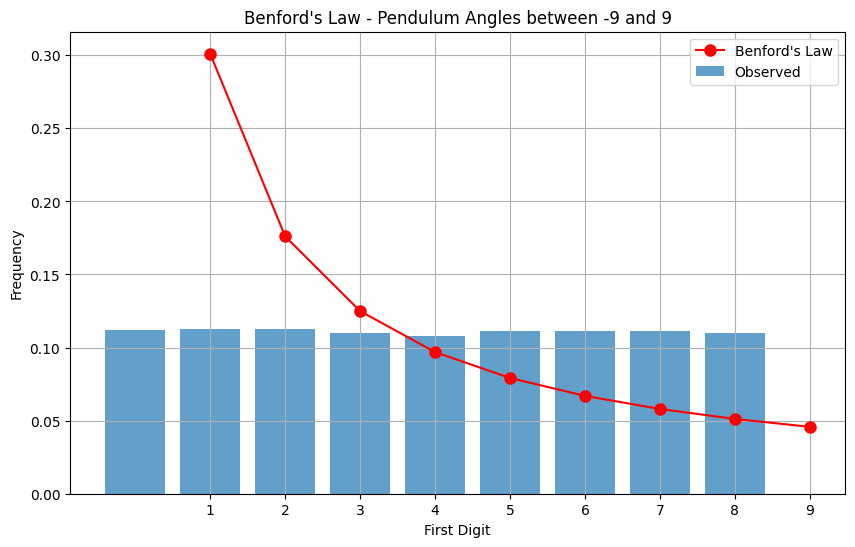

         Angles
0      4.863203
1     -7.143074
2     -5.212928
3      3.444973
4     -5.149672
...         ...
99995 -7.766276
99996  2.965956
99997 -2.554821
99998 -0.089091
99999  8.405822

[100000 rows x 1 columns]


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Função para gerar o movimento do pêndulo
def simulate_pendulum(num_samples=100_000):
    angles = np.random.uniform(-9, 9, num_samples)
    return angles

# Gerar 100000 amostras do movimento do pêndulo
pendulum_angles = simulate_pendulum()

# Criar um DataFrame com os valores gerados
df = pd.DataFrame(pendulum_angles, columns=['Angles'])

# Função para extrair o primeiro dígito
def extract_first_digit(series):
    first_digits = series.apply(lambda x: int(str(abs(int(x)))[0]) if str(abs(int(x)))[0].isdigit() else None).dropna()
    return first_digits

# Função para plotar a distribuição dos primeiros dígitos
def plot_benford_law(df, column, title):
    values = df[column].dropna()
    first_digits = extract_first_digit(pd.Series(values))
    digit_counts = first_digits.value_counts().sort_index()
    digit_counts = digit_counts / digit_counts.sum()  # Normalize to get probabilities

    benford_probs = np.log10(1 + 1 / np.arange(1, 10))

    plt.figure(figsize=(10, 6))
    plt.bar(digit_counts.index, digit_counts, alpha=0.7, label='Observed')
    plt.plot(np.arange(1, 10), benford_probs, 'ro-', label='Benford\'s Law', markersize=8)
    plt.title(f'Benford\'s Law - {title}')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(1, 10))
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar a Lei de Benford e plotar os gráficos para os valores gerados
plot_benford_law(df, 'Angles', 'Pendulum Angles between -9 and 9')

# Mostrar o DataFrame
print(df)
